**420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2021 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2021 Mikaël Swawola
<br/>
![Travaux Pratiques - Variables explicatives catégorielles](static/07-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques est consacrée à la transformation des variables explicatives catégorielles en **variables indicatrices**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.decomposition import PCA

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### 1 - Lecture du jeu de données *Heart*

**Exercice 1: lire le fichier `Heart.csv`**

In [4]:
# Compléter le code ci-dessous ~ 1 ligne
HRT = pd.read_csv('../../data/Heart.csv', usecols=['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal','AHD'])

In [5]:
# On supprime les données manquantes. Ceci sera vu plus en détail plus tard dans le cours
HRT = HRT.dropna()

**Exercice 2: afficher les dix premières lignes de la trame de données**

In [6]:
# Compléter le code ci-dessous ~ 1 ligne
HRT.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


**Exercice 3: quel est le type de données (dtype) du ndarray sous-jacent ?**

In [7]:
# Compléter le code ci-dessous ~ 1 ligne
HRT.values.dtype

dtype('O')

In [8]:
HRT.values[1:4,:]

array([[67, 1, 'asymptomatic', 160, 286, 0, 2, 108, 1, 1.5, 2, 3.0,
        'normal', 'Yes'],
       [67, 1, 'asymptomatic', 120, 229, 0, 2, 129, 1, 2.6, 2, 2.0,
        'reversable', 'Yes'],
       [37, 1, 'nonanginal', 130, 250, 0, 0, 187, 0, 3.5, 3, 0.0,
        'normal', 'No']], dtype=object)

**Exercice 4: trouver tous les niveaux des variables catégorielles**<br/>
Indice: vous devrez utilisez la méthode `unique()` de pandas

In [9]:
# Compléter le code ci-dessous ~ 3 lignes
print(HRT['ChestPain'].unique())
print(HRT['Thal'].unique())
print(HRT['AHD'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


### 2 - Création des variables indicatrices

**Exercice 5: créer les variables indicatrices**<br/>

In [10]:
# Compléter le code ci-dessous ~ 7 lignes
HRT['ChestPainTypical'] = (HRT.ChestPain == 'typical').astype(int)
HRT['ChestPainAsymptomatic'] = (HRT.ChestPain == 'asymptomatic').astype(int)
HRT['ChestPainNonangina'] = (HRT.ChestPain == 'nonanginal').astype(int)
HRT = HRT.drop('ChestPain', axis = 1)

HRT['ThalFixed'] = (HRT.Thal == 'fixed').astype(int)
HRT['ThalNormal'] = (HRT.Thal == 'normal').astype(int)
HRT = HRT.drop('Thal', axis = 1)

HRT['AHD'] = (HRT['AHD'] == 'Yes').astype(int)

**Exercice 6: quel est maintenant le type de données (dtype) du ndarray sous-jacent ?**

In [11]:
# Compléter le code ci-dessous ~ 1 ligne
HRT.values.dtype

dtype('float64')

### 3 - Affichages des composante principales (contenu non inclus dans le cours)

In [12]:
X = HRT.drop(['AHD'], axis=1).values
y = HRT.AHD.values
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

Text(0, 0.5, 'PC2')

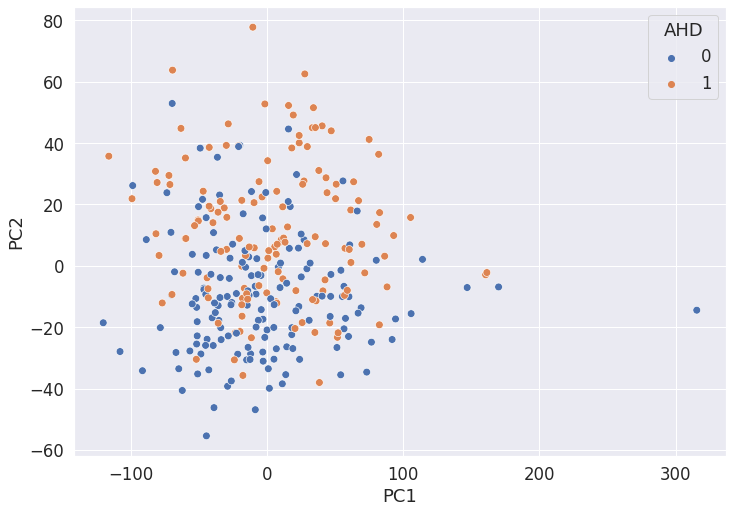

In [13]:
ax = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=HRT['AHD'], s = 60)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Fin du TP